In [1]:
# Description: This programe is inspired by Youtube Channel Computer Science https://www.youtube.com/watch?v=iGWbqhdjf2s with some imprpvements
#              A convolutional neural networks (CNN)-based machine learning algorithm which incoporates TensorFlow and Keras to classify images
#              Trained with the CIFAR-100 dataset.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load Data
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 2s 0us/step


In [4]:
# Check data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get shape of arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# Look at the first image as an array
index = 0
x_train[index] 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

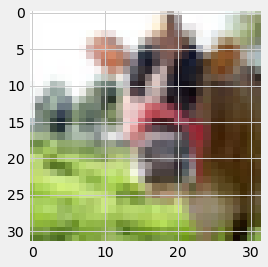

In [7]:
# Show image as img
img = plt.imshow(x_train[index])

In [8]:
# Get image label
print('The image label is: ', y_train[index])

The image label is:  [19]


In [9]:
# Image classification defined by CIFAR
classification = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Print Image Class
print('The image class is : ', classification[y_train[index][0]])

The image class is :  cattle


In [10]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
# Print the new labels
print(y_train_one_hot)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Print the new label of the image/ picture above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [13]:
# Normalize pixels to values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [14]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape = (32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another convolution layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 2000 neurons
model.add(Dense(2000, activation = 'relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation = 'relu'))

# Add a layer with 100 neurons
model.add(Dense(100, activation = 'softmax'))

In [15]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=250, epochs=10, validation_split=0.2)

Epoch 1/10
160/160 [==============================] - 63s 386ms/step - loss: 4.4258 - accuracy: 0.0304 - val_loss: 3.7001 - val_accuracy: 0.1286
Epoch 2/10
160/160 [==============================] - 61s 379ms/step - loss: 3.6334 - accuracy: 0.1365 - val_loss: 3.2788 - val_accuracy: 0.2070
Epoch 3/10
160/160 [==============================] - 61s 381ms/step - loss: 3.2469 - accuracy: 0.2055 - val_loss: 2.9954 - val_accuracy: 0.2560
Epoch 4/10
160/160 [==============================] - 63s 397ms/step - loss: 2.9843 - accuracy: 0.2558 - val_loss: 2.8701 - val_accuracy: 0.2855
Epoch 5/10
160/160 [==============================] - 60s 377ms/step - loss: 2.8172 - accuracy: 0.2887 - val_loss: 2.7503 - val_accuracy: 0.3141
Epoch 6/10
160/160 [==============================] - 60s 376ms/step - loss: 2.6135 - accuracy: 0.3297 - val_loss: 2.6790 - val_accuracy: 0.3262
Epoch 7/10
160/160 [==============================] - 60s 375ms/step - loss: 2.4766 - accuracy: 0.3538 - val_loss: 2.5907 - val_ac

In [17]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 21ms/step - loss: 2.4861 - accuracy: 0.3714


0.37139999866485596

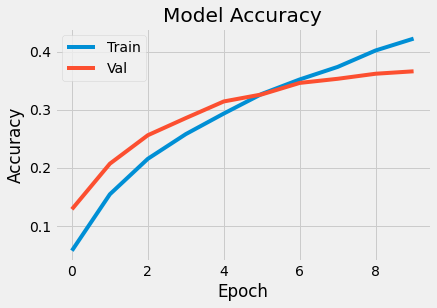

In [18]:
# Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

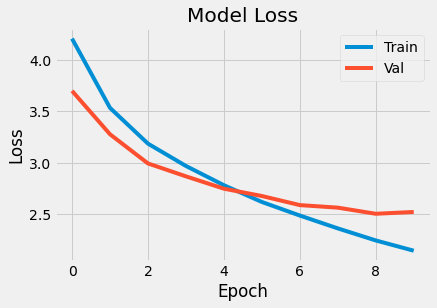

In [19]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [32]:
# Resize the image
new_image = plt.imread("sample_data/lion.jpg")
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))

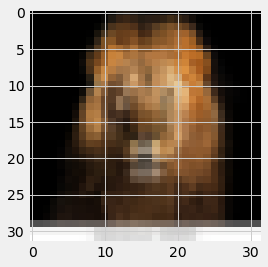

In [33]:
# Show the images
img = plt.imshow(new_image)
img = plt.imshow(resized_image)

In [34]:
# Get the model's prediction
predictions = model.predict(np.array([resized_image]))
# Show prediction
print(predictions)

[[3.50461107e-07 7.99908958e-06 2.45094416e-04 3.48214700e-04
  2.44000712e-05 1.07363938e-07 4.80419612e-06 1.10167733e-07
  4.60216654e-07 7.10412787e-05 6.19410275e-05 3.29325907e-04
  8.60021654e-09 1.78332744e-08 1.10348651e-06 6.27876492e-03
  1.60693147e-04 3.00865054e-07 4.85100918e-06 7.80030387e-05
  3.16075663e-08 3.40846918e-06 1.19739457e-03 1.40618530e-08
  8.28768407e-07 1.19561889e-07 2.79530695e-06 1.18368985e-06
  5.26212621e-04 1.32140471e-04 1.42478411e-08 2.24447886e-05
  7.33221987e-06 1.37018719e-06 3.33622545e-02 2.06511747e-03
  1.35060893e-02 4.73731143e-06 1.47695572e-03 1.61318141e-07
  9.05704161e-04 4.00597138e-08 4.63529956e-03 9.04608786e-01
  9.11145162e-06 9.50545291e-06 4.61499585e-04 4.94819581e-08
  3.74875103e-10 1.90898697e-09 2.72778096e-03 2.07268313e-04
  5.64551426e-11 8.51698871e-07 3.93203482e-06 1.19703545e-04
  2.84436908e-07 1.01418816e-03 2.35209907e-11 8.65951009e-08
  9.85228739e-12 1.89638886e-05 8.88183571e-09 1.13434129e-04
  1.4732

In [35]:
# Sort the predictions in accending order
list_index = np.arange(100).tolist()
x = predictions

for i in range(100):
  for j in range(100):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[43, 34, 36, 88, 15, 80, 42, 50, 97, 98, 35, 38, 64, 22, 57, 40, 65, 77, 28, 46, 3, 11, 2, 51, 16, 29, 55, 63, 19, 72, 9, 10, 66, 94, 4, 31, 86, 61, 45, 44, 79, 1, 78, 32, 18, 6, 37, 54, 21, 93, 67, 99, 87, 26, 92, 84, 33, 27, 14, 89, 69, 53, 24, 70, 8, 74, 0, 96, 17, 76, 56, 39, 73, 25, 83, 7, 5, 59, 91, 47, 41, 20, 85, 13, 81, 30, 23, 75, 62, 12, 90, 82, 49, 68, 48, 71, 95, 52, 58, 60]


In [36]:
# Print the first 5 predictions
print('Classification :')
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Classification :
lion : 90.46 %
fox : 3.34 %
hamster : 1.35 %
tiger : 1.24 %
camel : 0.63 %
